In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Gerar dados de exemplo
data = pd.read_csv("https://raw.githubusercontent.com/edusantosgoncalves/SCR_modelos/main/DataSetForSCR_Final.csv", encoding="unicode_escape")
data["Label"] = data["Label"].replace('Non SCR', 0)
data["Label"] = data["Label"].replace('SCR', 1)
# !! C LIMPEZA PARCIAL
X = data["Sentence"].str.lower()
X = X.str.replace("[^a-zA-Z0-9 ]", " ")
Y = data["Label"]

0                                this app is quite good. 
1       it consist a lot of features at the moment eve...
2       i feel there should be a limit of messages in ...
3                   it is not harmful but time consuming.
4       for the past week i keep getting an error that...
                              ...                        
3495                                          its stupid.
3496    if you don't swipe perfectly to the left or ri...
3497    i tried contacting the developer without any r...
3498     i bought the paid version but completely regr...
3499               voice problem, doesn't work smoothly. 
Name: Sentence, Length: 3500, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
3495    0
3496    1
3497    0
3498    0
3499    1
Name: Label, Length: 3500, dtype: int64


C:\Users\dudue\AppData\Local\Temp\ipykernel_14804\235147697.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Label"] = data["Label"].replace('SCR', 1)


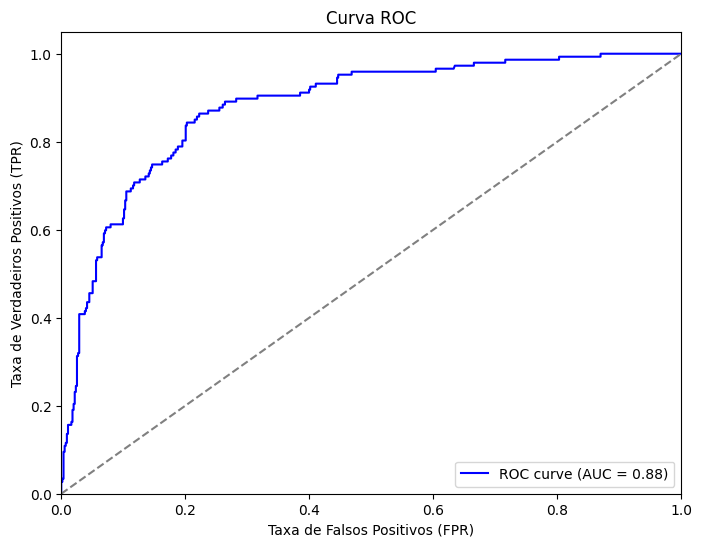

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Criar um objeto CountVectorizer
count_vectorizer = CountVectorizer(min_df=5, ngram_range=(1,2), binary=False)

# Ajustar e transformar os dados de treino
X_train_count = count_vectorizer.fit_transform(X_train)

# Transformar os dados de teste
X_test_count = count_vectorizer.transform(X_test)

# Treinar o modelo de regressão logística
model = LogisticRegression(penalty='l2')
model.fit(X_train_count, Y_train)

# Fazer previsões no conjunto de teste
#y_pred = model.predict(X_test_count)
y_pred = model.predict_proba(X_test_count)[:, 1] 

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# Calcular a área sob a curva ROC (AUC)
auc = roc_auc_score(Y_test, y_pred)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
